#### **Default for File Path**

In [474]:
import importlib.util
import os

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

### **Run Till Model Creation [Based on O,H,L,C]**

In [475]:
import pandas as pd

file_path = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
df = pd.read_csv(file_path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
...,...,...,...,...,...,...,...
6496,2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
6497,2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
6498,2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0
6499,2021-10-18,1740.000000,1799.000000,1740.000000,1792.150024,1792.150024,13438109.0


In [476]:
df = df[['Date', 'Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close
0,1996-01-01,0.794921,0.796679,0.791015,0.796679
1,1996-01-02,0.794921,0.798828,0.793457,0.793457
2,1996-01-03,0.798828,0.798828,0.798828,0.798828
3,1996-01-04,0.791015,0.794921,0.791015,0.793554
4,1996-01-05,0.784179,0.784179,0.784179,0.784179
...,...,...,...,...,...
6496,2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024
6497,2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951
6498,2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000
6499,2021-10-18,1740.000000,1799.000000,1740.000000,1792.150024


In [477]:
# to convert date from string to datetime
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\nilay\AppData\Local\Temp\ipykernel_3712\3967493437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
6496   2021-10-12
6497   2021-10-13
6498   2021-10-14
6499   2021-10-18
6500   2021-10-19
Name: Date, Length: 6501, dtype: datetime64[ns]

In [478]:
df.index = df.pop('Date')
df

,Open,High,Low,Close
Date,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679
1996-01-02,0.794921,0.798828,0.793457,0.793457
1996-01-03,0.798828,0.798828,0.798828,0.798828
1996-01-04,0.791015,0.794921,0.791015,0.793554
1996-01-05,0.784179,0.784179,0.784179,0.784179
...,...,...,...,...
2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024
2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951
2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000


In [479]:
# Assuming df is your DataFrame
df.dropna(axis=0, inplace=True)

C:\Users\nilay\AppData\Local\Temp\ipykernel_3712\2231426680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


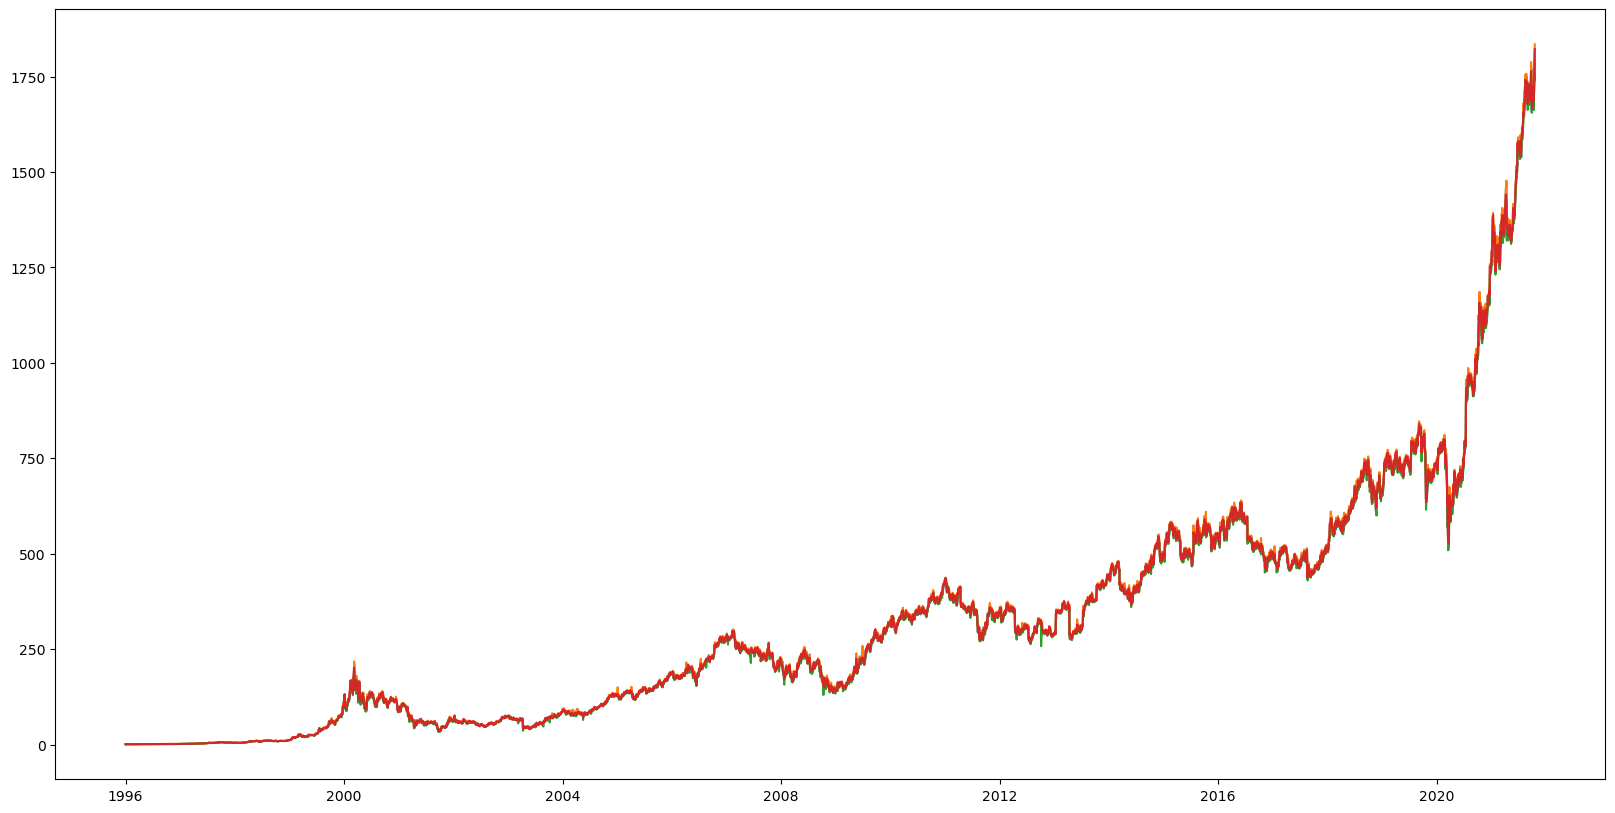

In [480]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Open'])
plt.plot(df.index, df['High'])
plt.plot(df.index, df['Low'])
plt.plot(df.index, df['Close'])

In [481]:
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2010-01-04', 
                                '2018-01-01', 
                                n=100)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_3712\2573285670.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_3712\2573285670.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_3712\2573285670.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

,Target Date,Open-100,High-100,Low-100,Close-100,Open-99,High-99,Low-99,Close-99,Open-98,...,Low-2,Close-2,Open-1,High-1,Low-1,Close-1,Open-Target,High-Target,Low-Target,Close-Target
0,2010-01-04,245.037506,249.737503,243.024994,248.087494,248.281250,252.750000,248.281250,251.743744,253.987503,...,309.593750,313.762512,314.987488,316.262512,312.100006,312.799988,326.250000,328.750000,324.412506,326.575012
1,2010-01-05,248.281250,252.750000,248.281250,251.743744,253.987503,259.875000,253.337494,258.043762,258.000000,...,312.100006,312.799988,326.250000,328.750000,324.412506,326.575012,327.500000,328.837494,325.012512,327.668762
2,2010-01-06,253.987503,259.875000,253.337494,258.043762,258.000000,261.674988,256.018738,259.556244,260.000000,...,324.412506,326.575012,327.500000,328.837494,325.012512,327.668762,335.375000,335.375000,321.887512,322.887512
3,2010-01-07,258.000000,261.674988,256.018738,259.556244,260.000000,260.931244,252.625000,255.468750,257.462494,...,325.012512,327.668762,335.375000,335.375000,321.887512,322.887512,323.325012,323.325012,314.774994,315.631256
4,2010-01-08,260.000000,260.931244,252.625000,255.468750,257.462494,263.375000,257.462494,262.325012,262.500000,...,321.887512,322.887512,323.325012,323.325012,314.774994,315.631256,314.875000,315.412506,307.250000,308.024994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,2017-12-26,505.500000,508.500000,499.174988,502.774994,503.000000,506.375000,493.600006,496.674988,495.500000,...,499.200012,511.024994,508.000000,522.400024,508.000000,519.674988,515.000000,520.750000,511.500000,517.799988
1970,2017-12-27,503.000000,506.375000,493.600006,496.674988,495.500000,499.375000,490.125000,492.000000,494.000000,...,508.000000,519.674988,515.000000,520.750000,511.500000,517.799988,514.000000,519.549988,513.700012,517.125000
1971,2017-12-28,495.500000,499.375000,490.125000,492.000000,494.000000,494.500000,488.024994,491.875000,491.750000,...,511.500000,517.799988,514.000000,519.549988,513.700012,517.125000,515.000000,520.000000,511.899994,516.625000
1972,2017-12-29,494.000000,494.500000,488.024994,491.875000,491.750000,491.875000,482.850006,484.125000,484.250000,...,513.700012,517.125000,515.000000,520.000000,511.899994,516.625000,515.049988,524.400024,515.000000,521.025024


In [482]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1974,), (1974, 100, 4), (1974, 4))

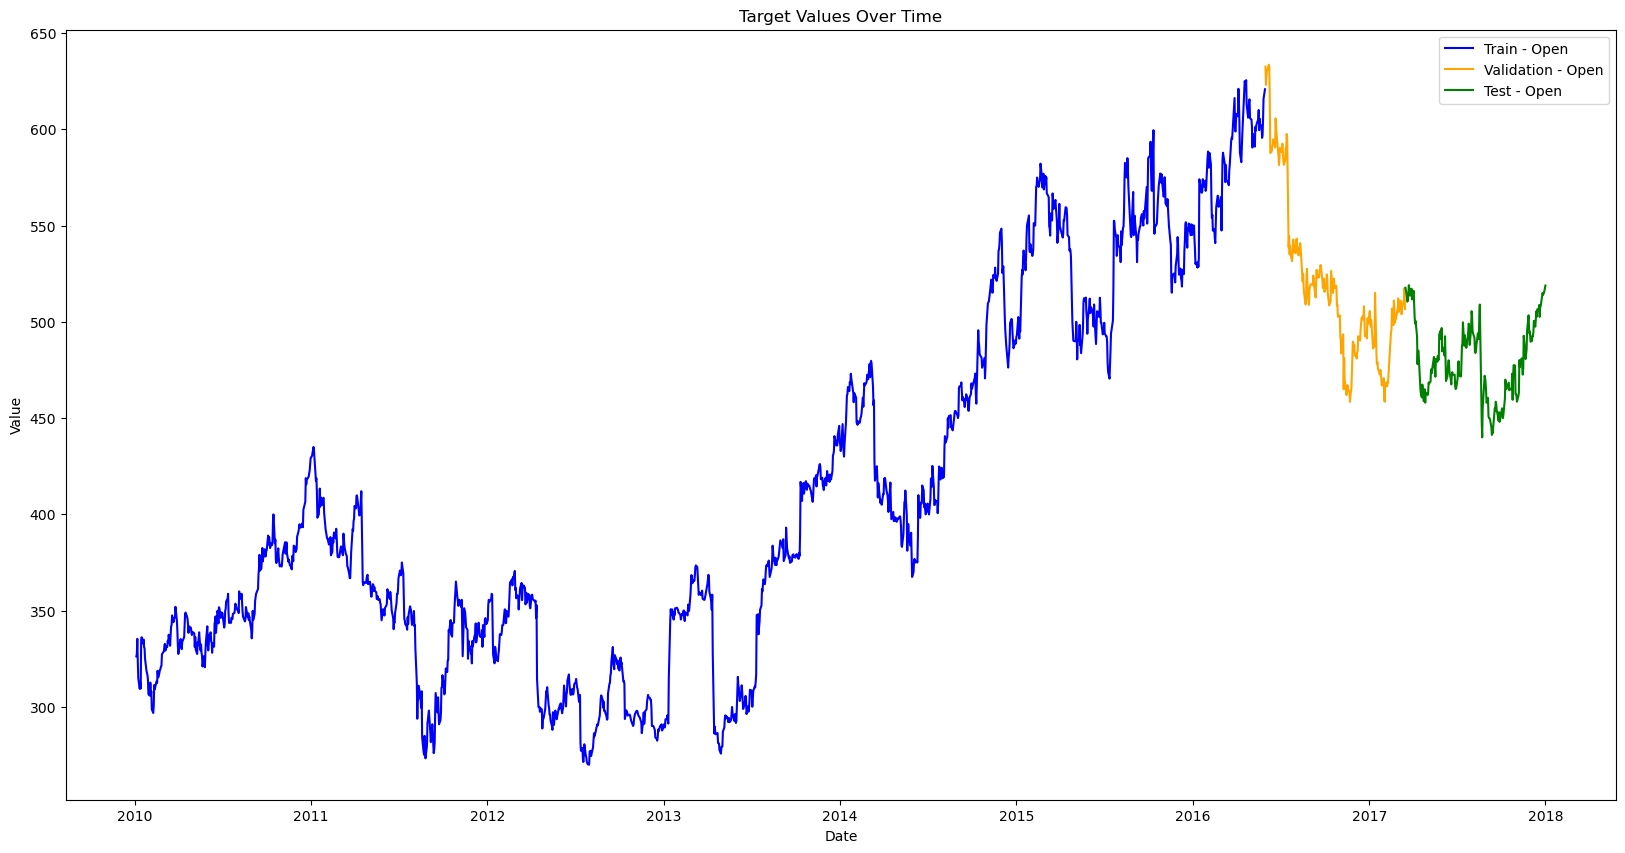

In [491]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(20, 10))

# Plotting target values for each feature set
plt.plot(dates_train, y_train[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val, y_val[:, 0], label='Validation - Open', color='orange')
plt.plot(dates_test, y_test[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [492]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4)
])

# Compile the model
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=100, 
          callbacks=[early_stopping])


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - loss: 172786.3594 - mean_absolute_error: 405.5257 - val_loss: 270468.5000 - val_mean_absolute_error: 518.3784
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 172223.5781 - mean_absolute_error: 404.2686 - val_loss: 268602.8125 - val_mean_absolute_error: 516.5764
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 168241.0156 - mean_absolute_error: 400.1228 - val_loss: 265801.4375 - val_mean_absolute_error: 513.8573
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - loss: 164131.5469 - mean_absolute_error: 394.4817 - val_loss: 261886.5625 - val_mean_absolute_error: 510.0305
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 163887.7812 - mean_absolute_error: 393.9379 - val_loss: 256108.9531 - val_mean_absolute_error: 504.3232
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 160864.9688 - mean_absolute_error: 390.0139 - val_loss: 248534.3594 - val_mean_absolute_error: 496.7334
Epoc

In [493]:
train_predictions = model.predict(X_train)

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step


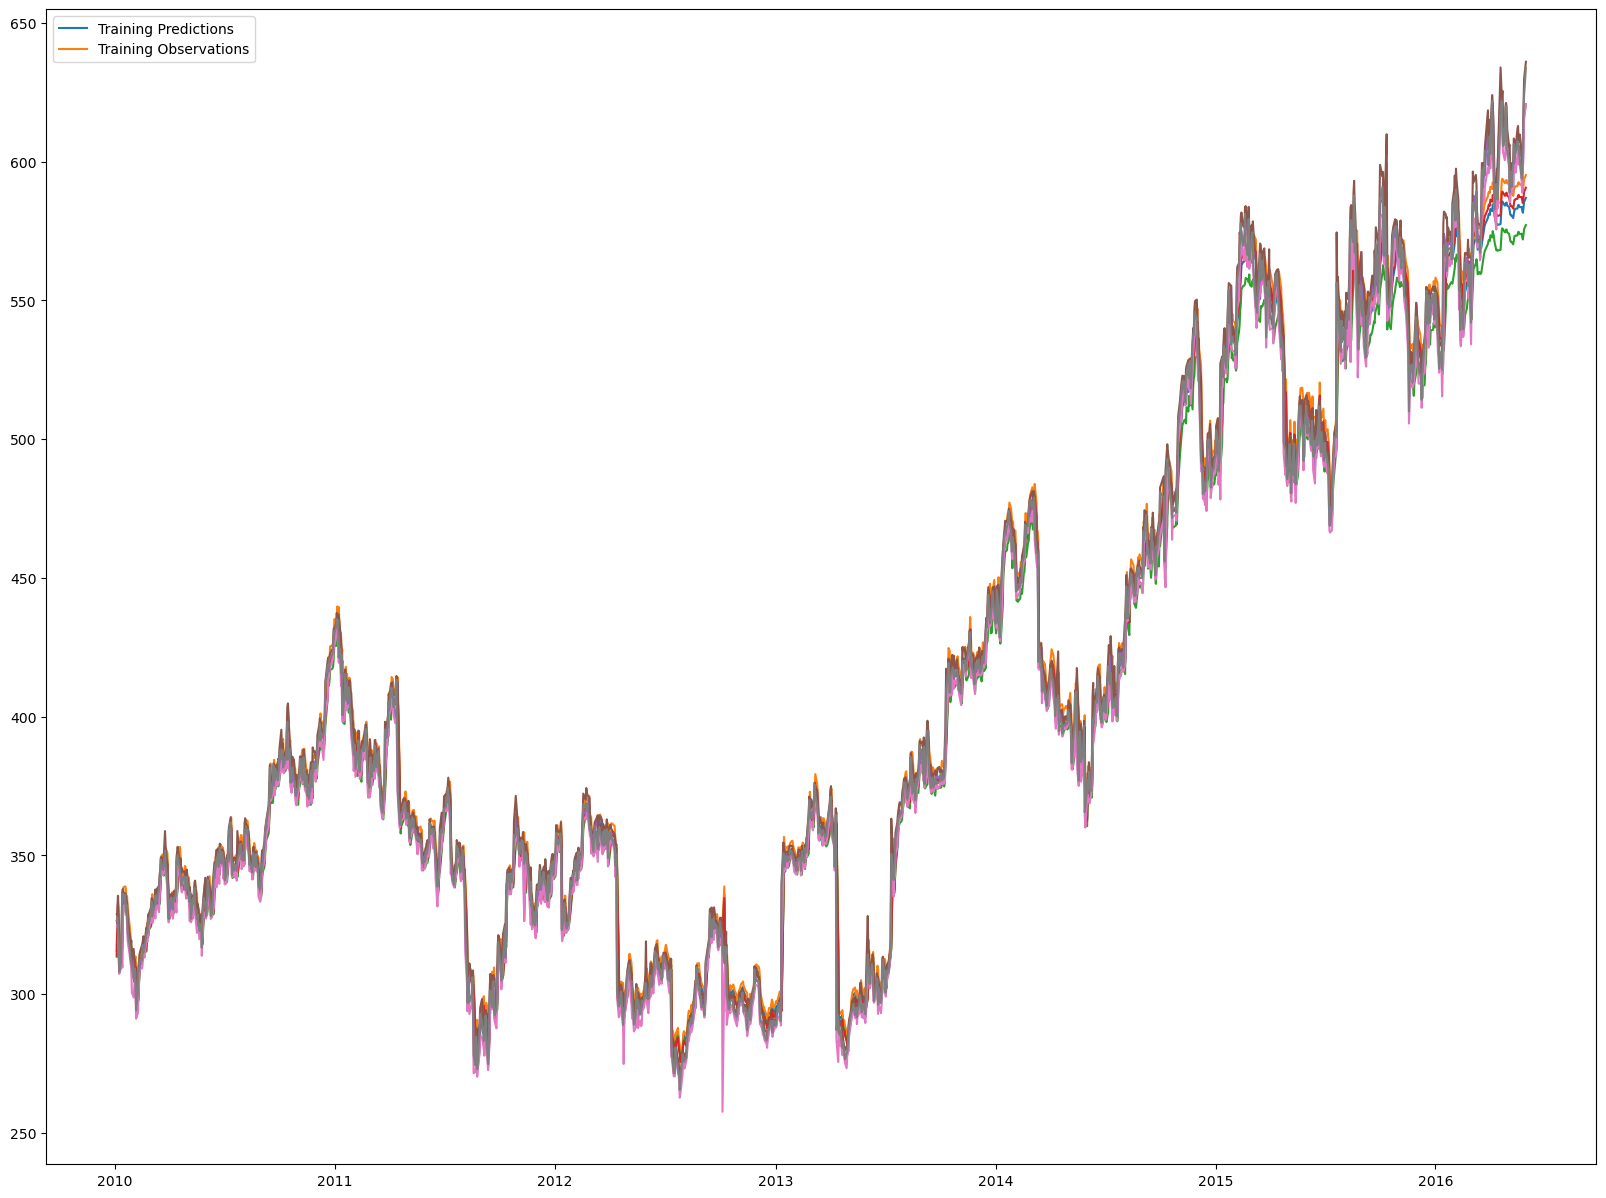

In [494]:

plt.figure(figsize=(20,15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [495]:
val_predictions = model.predict(X_val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


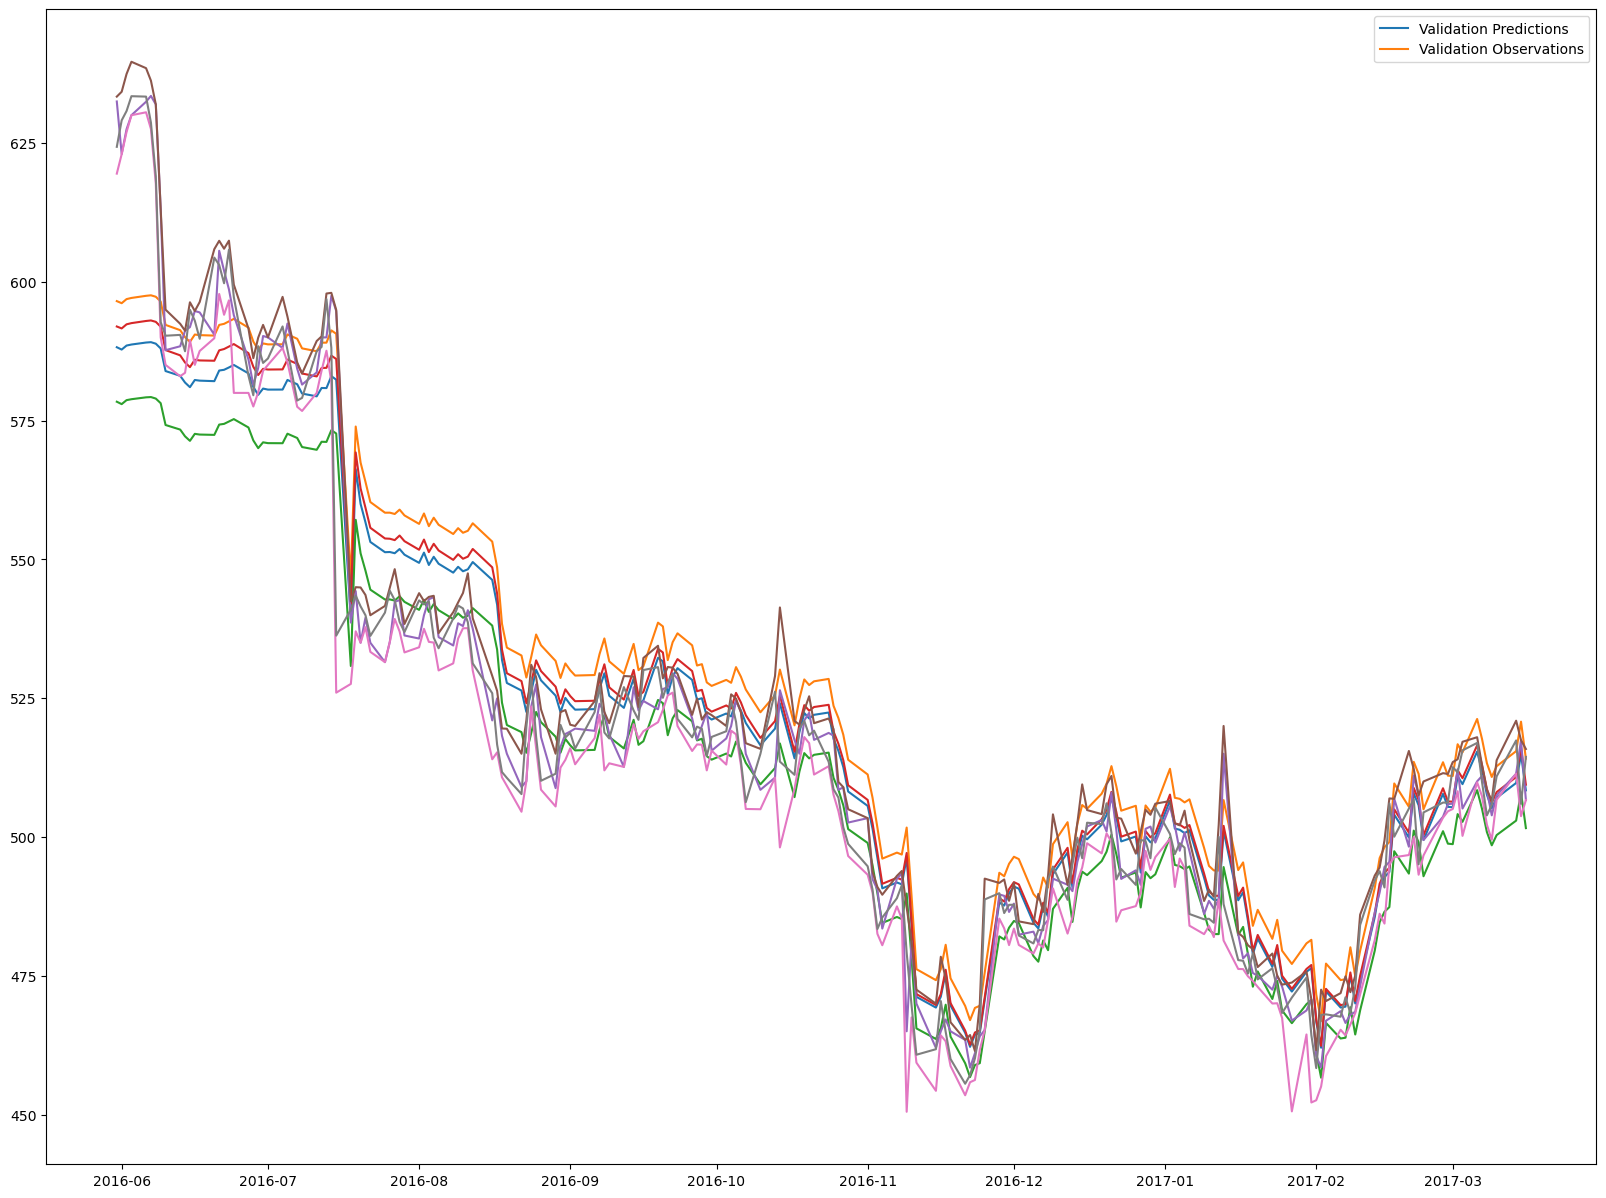

In [496]:
plt.figure(figsize=(20,15))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [497]:
test_predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [503]:
test_predictions.shape

(198, 4)

In [512]:
dates_test.shape

(198,)

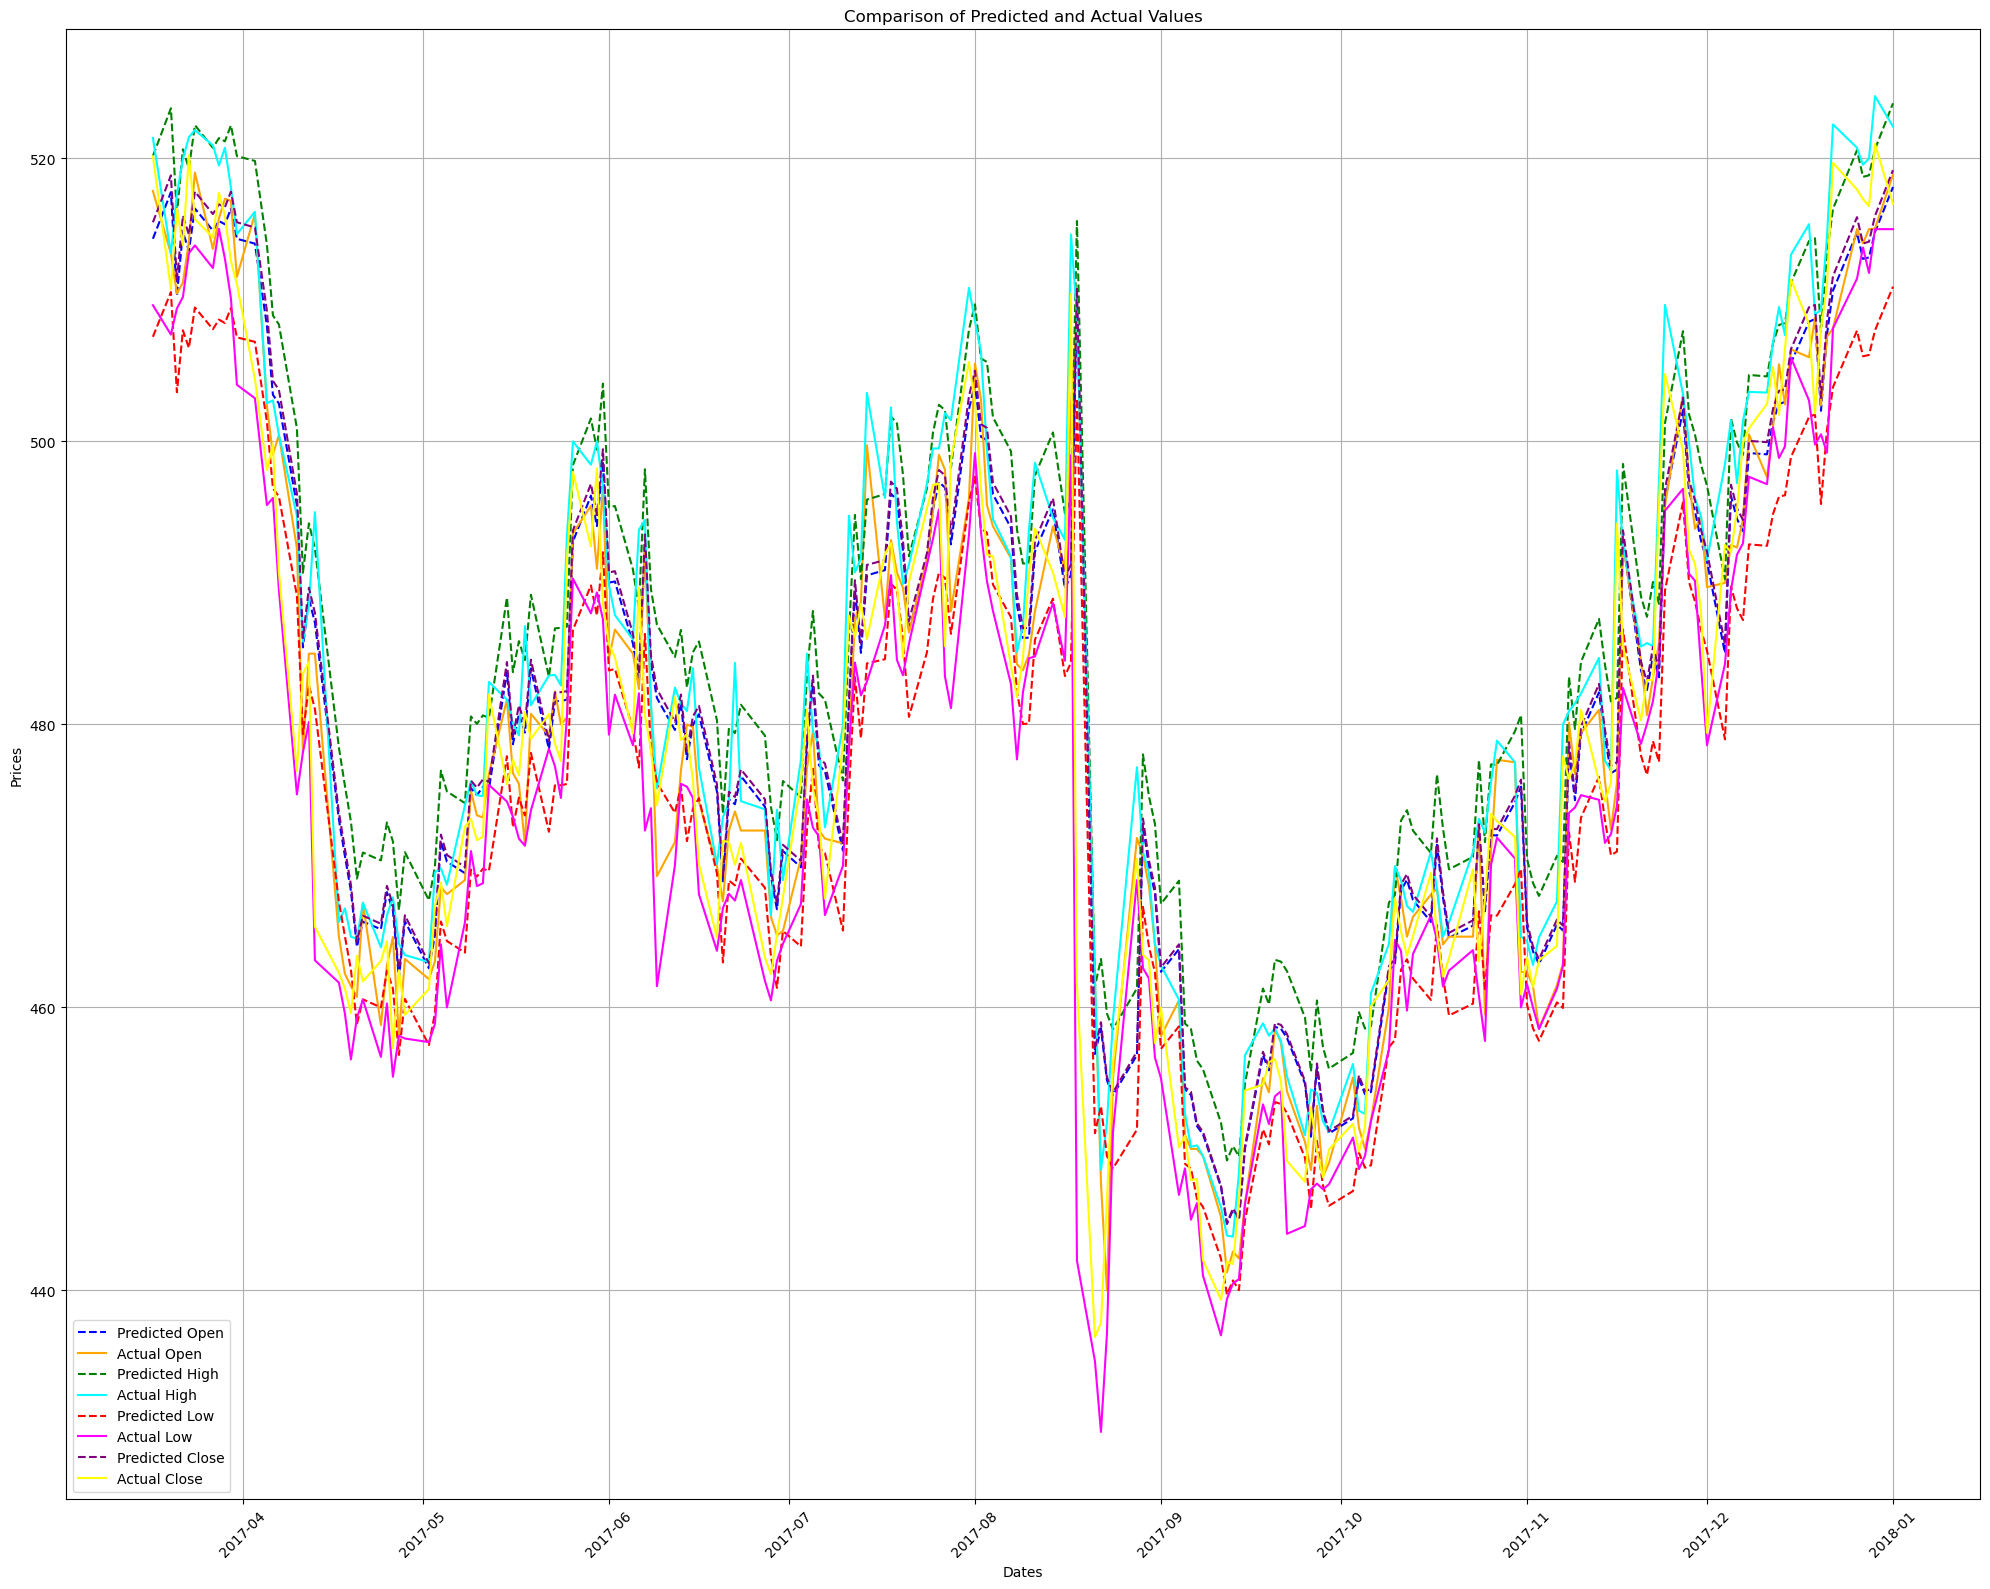

In [516]:
# Dictionary to map index to category
dict_i = {
    0: 'Open',
    1: 'High',
    2: 'Low',
    3: 'Close'
}

# Plotting
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Define colors for each category (Open, High, Low, Close)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

for i in range(4):  # Iterate through Open, High, Low, Close
    plt.plot(dates_test, test_predictions[:, i], label=f'Predicted {dict_i[i]}', linestyle='--', color=colors[i])
    plt.plot(dates_test, y_test[:, i], label=f'Actual {dict_i[i]}', linestyle='-', color=colors[i+4])

plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

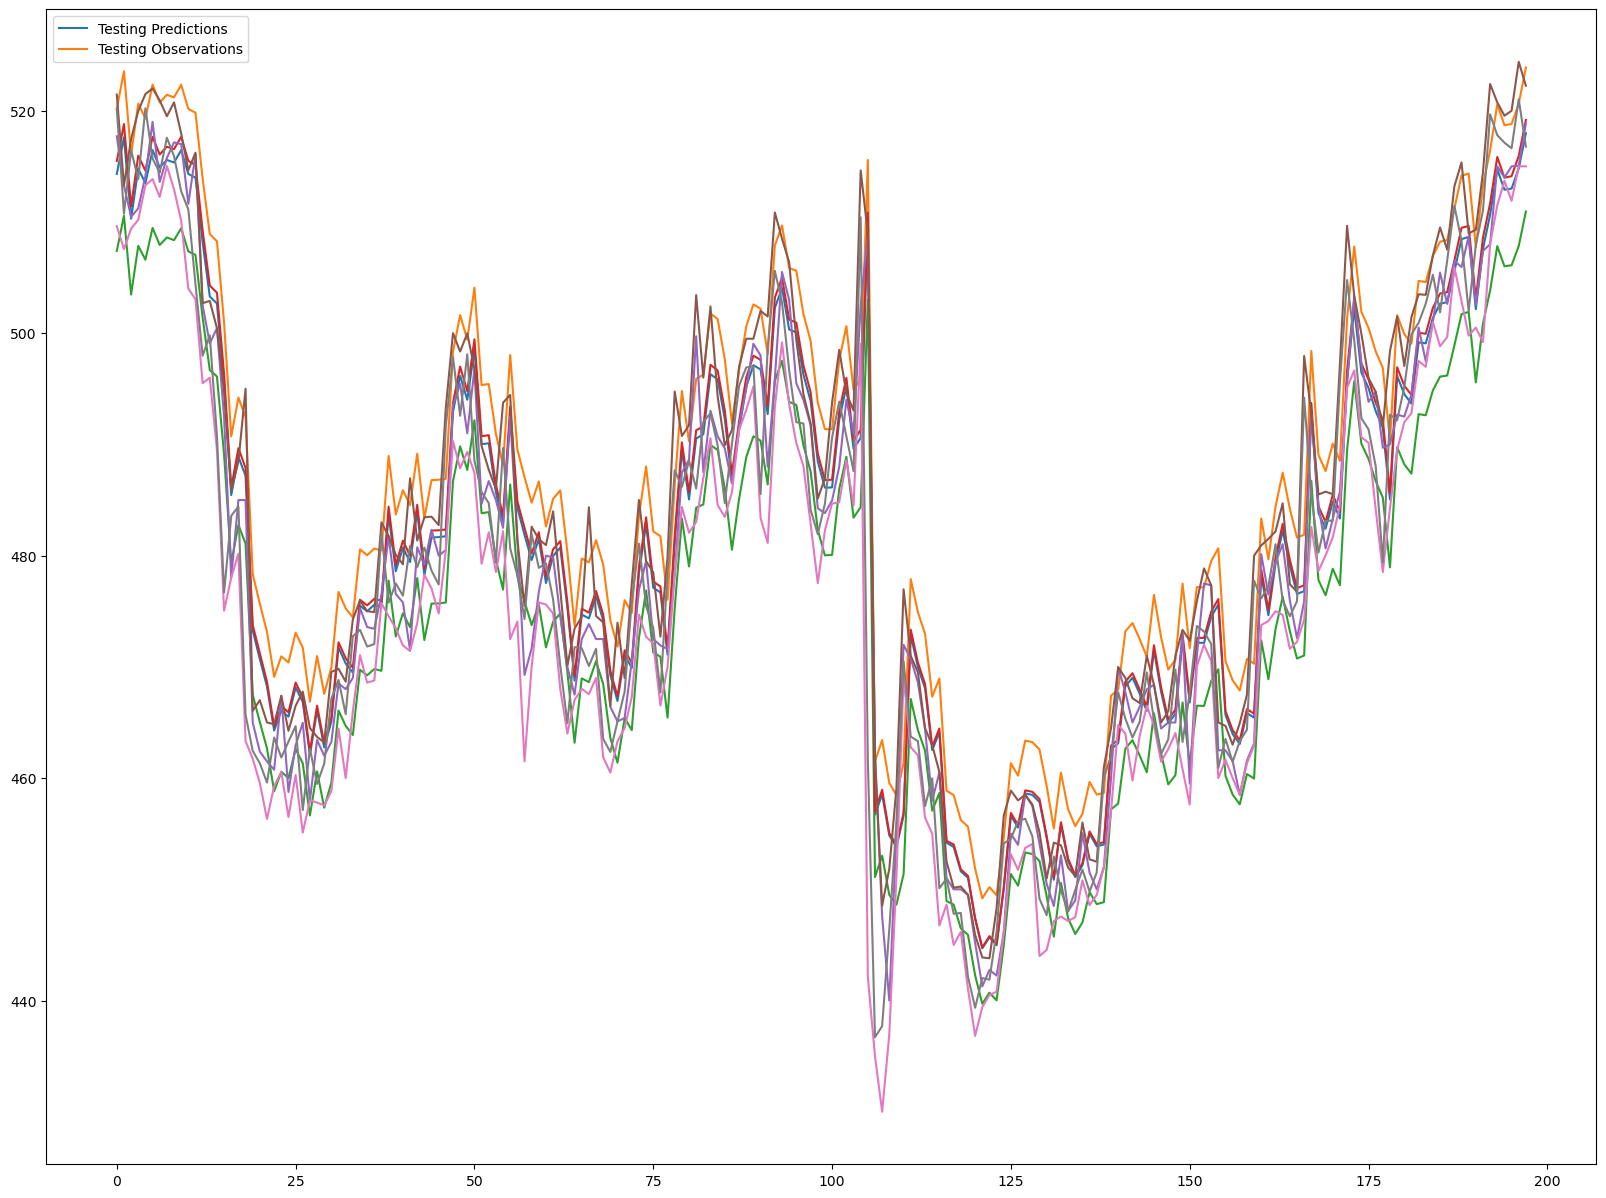

In [502]:
plt.figure(figsize=(20,15))
plt.plot(test_predictions)
plt.plot(y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])